In [66]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib as mt
import sklearn as sk
import scipy as sc
import statsmodels as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy import stats
from statsmodels import stats
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.linear_model import LogisticRegression

In [67]:
#all = pd.read_excel("C:\\Users\\swidrak\\OneDrive\\python\\ultimatum2\\data\\allupdated.xlsx")
all = pd.read_excel("C:\\Users\\Justyna\\Python Scripts\\ultimatum2\\data\\ultimatum2.xlsx")

In [68]:
all = all[all["cut"] == "keep"]
all = all[all["cut2"] == "keep"]

In [69]:
#new columns
all.loc[:,'name'] = all.loc[:,'agent'].apply(lambda x: "low status" if x == 0 else "high status")

all['touchN'] = all.loc[:,('touch')].apply(lambda x: 0 if x == 0.0 else 1)

all['cult'] = all.loc[:,('country')].apply(lambda x: 1 if x == "pl" else 0)

all['offerParC'] = all.loc[:,'offerPar'].apply(lambda x: "unfair" if x < 36 else ("fair" if x > 36 and x < 46 else "generous"))


In [70]:
pro = all[all["parPro"] == 1]
res = all[all["parPro"] == 0]

pl = all[all["country"] == "pl"]
ca = all[all["country"] == "cat"]

plpro = pl[pl["parPro"] == 1]
capro = ca[ca["parPro"] == 1]

plres = pl[pl["parPro"] == 0]
cares = ca[ca["parPro"] == 0]

In [71]:
#all.to_excel("C:\\Users\\Justyna\\Python Scripts\\ultimatum2\\data\\allupdated.xlsx")

In [72]:
#res.head(10)

# ??

In [73]:
crl = all[all['round'] == 1] 

In [74]:
# no correlation between scales - independent cov structure?

crl.groupby("cult")[[ "Zstat", "Zatg", "Zemb","ZsocPres"]].corr()

Zstat      Zatg      Zemb  ZsocPres
cult                                                 
0    Zstat     1.000000  0.414064 -0.134192 -0.106214
     Zatg      0.414064  1.000000 -0.261974 -0.196960
     Zemb     -0.134192 -0.261974  1.000000  0.583175
     ZsocPres -0.106214 -0.196960  0.583175  1.000000
1    Zstat     1.000000  0.072433 -0.101499  0.669021
     Zatg      0.072433  1.000000  0.051406 -0.016406
     Zemb     -0.101499  0.051406  1.000000 -0.376007
     ZsocPres  0.669021 -0.016406 -0.376007  1.000000

In [77]:
data = res
fam = sm.families.Binomial()

gor = sm.genmod.cov_struct.Autoregressive()
mod = smf.gee("accepted ~ touch*agent*cult + cult*Zatg + cult*Zstat + Zemb + ZsocPres", "ID", data, cov_struct=gor, family=fam)

results = mod.fit()
print(results.summary())
print(gor.summary())

## tutaj cala tabela razem z uwzglednieniem interakcji
print(results.wald_test_terms())
#z combine terms wyszczegolnionym, jesli w mod nie uwzgledniamy interakcji tylko oddzielne predyktory
#print(results.wald_test_terms(combine_terms=("touch","agent")))

                               GEE Regression Results                              
Dep. Variable:                    accepted   No. Observations:                  624
Model:                                 GEE   No. clusters:                       52
Method:                        Generalized   Min. cluster size:                  12
                      Estimating Equations   Max. cluster size:                  12
Family:                           Binomial   Mean cluster size:                12.0
Dependence structure:       Autoregressive   Num. iterations:                     9
Date:                     Mon, 27 Aug 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         18:49:56
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2654      0.291     -4.350      0.000      -1.836  

# IN THE PAPER

In [83]:
data = res
fam = sm.families.Binomial()

gor = sm.cov_struct.Autoregressive()
mod = smf.gee("accepted ~ touch*agent*cult + Zatg*cult + Zstat*cult + Zemb + ZsocPres",
              "ID", data, cov_struct=gor, family=fam)

#summ = sm.genmod.cov_struct.GlobalOddsRatio("nominal")

results = mod.fit()
print(results.summary())
print(gor.summary())
print(results.wald_test_terms())

                               GEE Regression Results                              
Dep. Variable:                    accepted   No. Observations:                  624
Model:                                 GEE   No. clusters:                       52
Method:                        Generalized   Min. cluster size:                  12
                      Estimating Equations   Max. cluster size:                  12
Family:                           Binomial   Mean cluster size:                12.0
Dependence structure:       Autoregressive   Num. iterations:                     9
Date:                     Mon, 27 Aug 2018   Scale:                           1.000
Covariance type:                    robust   Time:                         18:52:12
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2654      0.291     -4.350      0.000      -1.836  

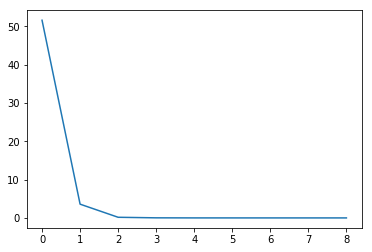

In [27]:
plt.plot([np.sqrt(np.sum(x**2)) for x in results.fit_history['score']])

# Linear Mixed Effects Models

## participant proposer

In [65]:
# comparison with GEE model (below)

data = pro
mod_lme = sm.MixedLM.from_formula("offerAg ~ agent*cult + Zatg*cult + Zstat*cult + Zemb + ZsocPres", 
                                  data, groups=data["ID"], use_sqrt=True)
results = mod_lme.fit()
print(results.summary())
print(results.wald_test_terms())

A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: offerAg  
No. Observations: 260     Method:             REML     
No. Groups:       52      Scale:              44.6078  
Min. group size:  5       Likelihood:         -888.0409
Max. group size:  5       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    44.950    2.052 21.910 0.000 40.929 48.971
agent        -1.463    1.173 -1.247 0.212 -3.763  0.837
cult         -2.576    2.680 -0.961 0.337 -7.829  2.677
agent:cult    2.683    1.692  1.585 0.113 -0.634  6.000
Zatg         -0.465    2.595 -0.179 0.858 -5.550  4.621
Zatg:cult     3.090    2.928  1.055 0.291 -2.650  8.830
Zstat         1.698    1.228  1.383 0.167 -0.708  4.104
Zstat:cult   -4.911    2.000 -2.455 0.014 -8.832 -0.990
Z

## in the paper so far

In [89]:
ind = sm.cov_struct.Autoregressive()
fml = "offerAg ~ agent*cult + Zatg*cult + Zstat*cult + Zemb + ZsocPres"
mod_gee = sm.GEE.from_formula(fml, groups=pro["ID"], cov_struct=ind, data=pro)
mod_gee = mod_gee.fit()

print(mod_gee.summary())
print(mod_gee.cov_struct.summary())
print(results.wald_test_terms())
print(ind.summary())

# http://nbviewer.jupyter.org/urls/umich.box.com/shared/static/lc6uf6dmabmitjbup3yt.ipynb

                               GEE Regression Results                              
Dep. Variable:                     offerAg   No. Observations:                  260
Model:                                 GEE   No. clusters:                       52
Method:                        Generalized   Min. cluster size:                   5
                      Estimating Equations   Max. cluster size:                   5
Family:                           Gaussian   Mean cluster size:                 5.0
Dependence structure:       Autoregressive   Num. iterations:                     9
Date:                     Mon, 27 Aug 2018   Scale:                          76.870
Covariance type:                    robust   Time:                         19:24:01
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.8732      1.619     27.718      0.000      41.700      48.046
agent  

In [87]:
# linear mixed effects model
data = pro
mod_lme = sm.MixedLM.from_formula("offerAg ~ agent*cult + Zatg*cult + Zstat*cult + Zemb + ZsocPres", 
                                  data, groups=data["ID"], use_sqrt=True)
results = mod_lme.fit()
print(results.summary())
print(results.wald_test_terms())

A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: offerAg  
No. Observations: 260     Method:             REML     
No. Groups:       52      Scale:              44.6078  
Min. group size:  5       Likelihood:         -888.0409
Max. group size:  5       Converged:          Yes      
Mean group size:  5.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    44.950    2.052 21.910 0.000 40.929 48.971
agent        -1.463    1.173 -1.247 0.212 -3.763  0.837
cult         -2.576    2.680 -0.961 0.337 -7.829  2.677
agent:cult    2.683    1.692  1.585 0.113 -0.634  6.000
Zatg         -0.465    2.595 -0.179 0.858 -5.550  4.621
Zatg:cult     3.090    2.928  1.055 0.291 -2.650  8.830
Zstat         1.698    1.228  1.383 0.167 -0.708  4.104
Zstat:cult   -4.911    2.000 -2.455 0.014 -8.832 -0.990
Z